In [ ]:
!pip install control
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Time [Minutes]')

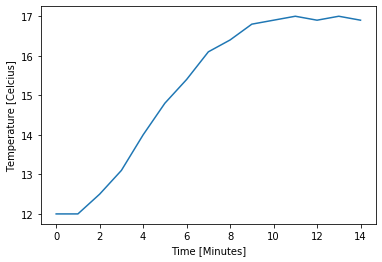

In [150]:
#Information from Problem
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
Tm = np.array([12, 12, 12.5, 13.1, 14, 14.8, 15.4, 16.1, 16.4, 16.8, 16.9, 17.0, 16.9, 17.0, 16.9])

plt.plot(t, Tm)
plt.ylabel('Temperature [Celcius]')
plt.xlabel('Time [Minutes]')

Text(0.5, 0, 'Time [Minutes]')

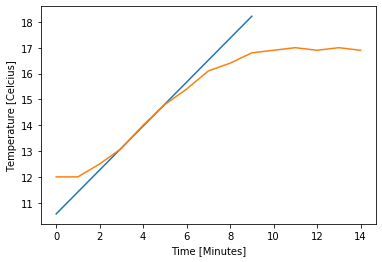

In [149]:
t_fit = t[3:6]
Tm_fit = Tm[3:6]
m,b = np.polyfit(t_fit, Tm_fit, 1)
tang = m*np.linspace(0,9) + b
t_tang = np.linspace(0,9) 

plt.plot(t_tang, tang)
plt.plot(t, Tm)
plt.ylabel('Temperature [Celcius]')
plt.xlabel('Time [Minutes]')

In [136]:
import sympy
from sympy import Symbol, solve, nsolve
# Theta from data aboce
x = Symbol('x')
solve(m * x + b - 12, x)

[1.68627450980393]

In [137]:
# Tau from data above
x2 = Symbol('x')
solve(m * x2 + b - 17, x)

[7.56862745098040]

In [152]:
# Using Table 12.1 on Page 207, Model H is selected

# Information on given values
K_V = 0.9
K_IP = 0.75
Ps0 = 18
Ps  = 20
KpKm = (Tm[-1] - Tm[0]) / (Ps - Ps0)
K = K_V * K_IP * KpKm

theta = 1.68627450980393 #Found value above
tau = 7.56862745098040 - theta #Found value above

# Given tauC = tau / 3

tauC = tau / 3
Kc_IMC = (1 / K) * ((tau + theta / 2) / (tauC + theta / 2))
tauI_IMC = tau + theta / 2
tauD_IMC = (tau * theta) / (2 * tau + theta)

Gd = tf([KpKm], [tau,1]) * tf(*pade(theta, n=3))
G =  tf([K], [tau, 1]) * tf(*pade(theta, n=3))

time = np.linspace(0, 30, 301)


K = 1.654
Kc = 1.450
theta = 1.686
tau = 5.882
tauC = 1.961
tauI = 6.725
tauD = 0.737


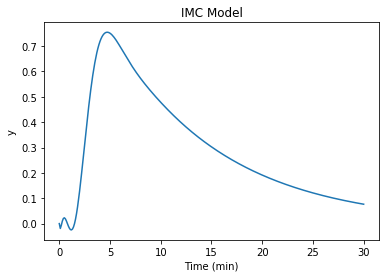

In [153]:
def simulation1 (Kc, tauI, tauD):
    Gc = tf([tauD_IMC, Kc_IMC, 1/tauI_IMC], [1,0]) 
    GOL = G*Gc                       
    Y_D = Gd / (1 + GOL)            
    y, t = step(Y_D, time)
    return y

def results1 (y, model):
  plt.plot(time, y, label = 'IMC')
  plt.xlabel('Time (min)')
  plt.ylabel('y')
  plt.title(model)
    
y_IMC = simulation (Kc_IMC, tauI_IMC, tauD_IMC)
results(y_IMC, "IMC Model")

print('K = ' + '{0:.3f}'.format(K))
print('Kc = ' + '{0:.3f}'.format(Kc_IMC))
print('theta = ' + '{0:.3f}'.format(theta))
print('tau = ' + '{0:.3f}'.format(tau))
print('tauC = ' + '{0:.3f}'.format(tauC))
print('tauI = ' + '{0:.3f}'.format(tauI_IMC))
print('tauD = ' + '{0:.3f}'.format(tauD_IMC))

In [154]:
# Using Table 12.4 on Page 211, PID Disturbance is selected
# Y = A*(theta/tau)^B

PA = 1.357
PB = -0.947
IA = 0.842
IB = -0.738
DA = 0.381
DB = 0.995

Kc_ITAE = (PA * (theta/tau)**PB) / K
tauI_ITAE = tau / (IA * (theta/tau)**IB)
tauD_ITAE = tau * (DA * (theta/tau)**DB)

K = 1.654
Kc = 2.679
theta = 1.686
tau = 5.882
tauC = 1.961
tauI = 2.778
tauD = 0.646


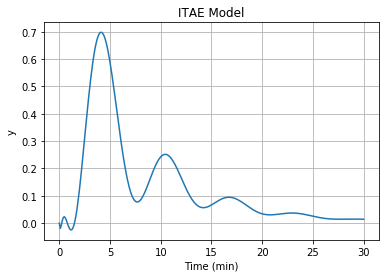

In [155]:
def simulation2 (Kc, tauI, tauD):
    Gc = tf([tauD_ITAE, Kc_ITAE, 1/tauI_ITAE], [1,0]) 
    GOL = G*Gc                         
    Y_D = Gd / (1 + GOL)            
    y, t = step(Y_D, time)
    return y

def results2(y, model):
  plt.grid()
  plt.plot(time, y, label = 'IMC')
  plt.xlabel('Time (min)')
  plt.ylabel('y')
  plt.title(model)

y_ITAE = simulation2 (Kc_ITAE, tauI_ITAE, tauD_ITAE)
results2(y_ITAE, "ITAE Model")

print('K = ' + '{0:.3f}'.format(K))
print('Kc = ' + '{0:.3f}'.format(Kc_ITAE))
print('theta = ' + '{0:.3f}'.format(theta))
print('tau = ' + '{0:.3f}'.format(tau))
print('tauC = ' + '{0:.3f}'.format(tauC))
print('tauI = ' + '{0:.3f}'.format(tauI_ITAE))
print('tauD = ' + '{0:.3f}'.format(tauD_ITAE))

In [156]:
# Using Table 12.7 on Page 215, PID is selected

Kcu = 6
Kc_ZN_test = 0.5 * Kcu
tauI_ZN_test = np.inf
tauD_ZN_test = 0

K = 1.654
Kc = 3.000
theta = 1.686
tau = 5.882
tauC = 1.961
tauI = inf
tauD = 0.000


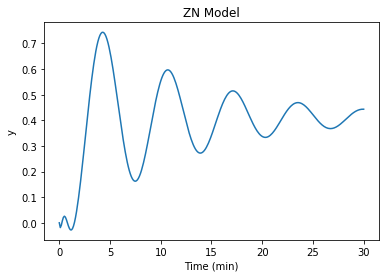

In [157]:
def simulation3 (Kc, tauI, tauD):
    Gc = tf([tauD_ZN_test, Kc_ZN_test, 1/tauI_ZN_test], [1,0])
    GOL = G*Gc                         
    Y_D = Gd / (1 + GOL)               
    y, t = step(Y_D, time)
    return y

def results3(y, model):
  plt.plot(time, y, label = 'IMC')
  plt.xlabel('Time (min)')
  plt.ylabel('y')
  plt.title(model)
    
y_ZN_test = simulation3 (Kc_ZN_test, tauI_ZN_test, tauD_ZN_test)
results3(y_ZN_test, "ZN Model")

print('K = ' + '{0:.3f}'.format(K))
print('Kc = ' + '{0:.3f}'.format(Kc_ZN_test))
print('theta = ' + '{0:.3f}'.format(theta))
print('tau = ' + '{0:.3f}'.format(tau))
print('tauC = ' + '{0:.3f}'.format(tauC))
print('tauI = ' + '{0:.3f}'.format(tauI_ZN_test))
print('tauD = ' + '{0:.3f}'.format(tauD_ZN_test))

In [158]:
# max of period 
y_ZN_test.max()

# Array that encompasses two instances of the maximum
y_ZN_period = y_ZN_test[41:103]

#The length of the period
len(y_ZN_period)

print("Pu = " + str(len(y_ZN_period)/10) + " [minutes]")

Pu = 6.2 [minutes]


In [159]:
# Using Table 12.7 on Page 215, PID is selected
Pu = 6.2
Kcu = 6.15
Kc_ZN = 3.69
tauI_ZN = Pu / 2
tauD_ZN = Pu / 8

K = 1.654
Kc = 3.690
theta = 1.686
tau = 5.882
tauC = 1.961
tauI = 3.100
tauD = 0.775


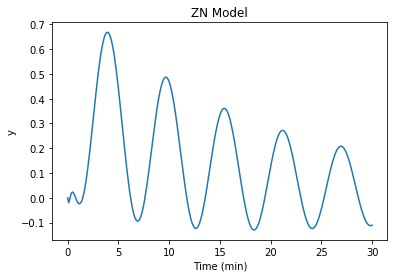

In [160]:
def simulation4 (Kc, tauI, tauD):
    Gc = tf([tauD_ZN, Kc_ZN, 1/tauI_ZN], [1,0]) 
    GOL = G*Gc                       
    Y_D = Gd / (1 + GOL)               
    y, t = step(Y_D, time)
    return y

def results4(y, model):
  plt.plot(time, y, label = 'IMC')
  plt.xlabel('Time (min)')
  plt.ylabel('y')
  plt.title(model)
    
y_ZN = simulation4 (Kc_ZN, tauI_ZN, tauD_ZN)
results4(y_ZN, "ZN Model")

print('K = ' + '{0:.3f}'.format(K))
print('Kc = ' + '{0:.3f}'.format(Kc_ZN))
print('theta = ' + '{0:.3f}'.format(theta))
print('tau = ' + '{0:.3f}'.format(tau))
print('tauC = ' + '{0:.3f}'.format(tauC))
print('tauI = ' + '{0:.3f}'.format(tauI_ZN))
print('tauD = ' + '{0:.3f}'.format(tauD_ZN))

Text(0.5, 1.0, 'Comparing Models')

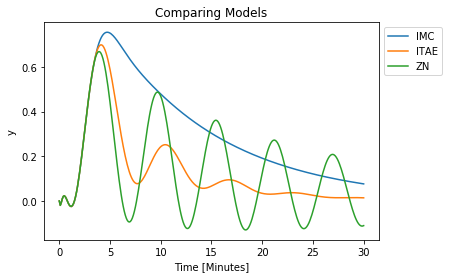

In [161]:
plt.plot(time, y_IMC, label = 'IMC')
plt.plot(time, y_ITAE, label = 'ITAE')
plt.plot(time, y_ZN, label = 'ZN')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Time [Minutes]')
plt.ylabel('y')
plt.title('Comparing Models')
